In [2]:
import pandas as pd 


In [3]:
df  = pd.read_csv("dataset/train.csv")

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
#dropiing the nan values
df = df.dropna()

In [6]:
# get the indepenedent and dependant features
X = df.drop(["label"], axis = 1)
y = df["label"]

In [7]:
X.head(5)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [8]:
print(X.shape, y.shape)

(18285, 4) (18285,)


In [9]:
import tensorflow as tf 

In [10]:
tf.__version__

'2.0.0'

# importing the libraries

In [11]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

# one hot representation

In [12]:
messages = X.copy()

In [13]:
import nltk
import re
from nltk.corpus import stopwords

In [14]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [98]:
#Tokeninf the senetnces

from nltk.stem.porter import PorterStemmer
def one_stop_preprocess(messages):
    messages.reset_index(inplace = True)
    ps = PorterStemmer()
    corpus = []
    #vocabulary size
    voc_size = 5000
    for i in range(0, len(messages)):
        #removing all specuial characters
        review = re.sub('[^a-zA-Z]', ' ', messages["title"][i])
        review = review.lower()
        review = review.split()
        review  = [ps.stem(word) for word in review if word not in stopwords.words("english")]
        review = " ".join(review)
        corpus.append(review)
    
    #one hot representation
    onehot_repr = [one_hot(words, voc_size) for words in corpus]
    # this is the maxmium sentnec length allowed 
    sentence_length  = 20
    embedded_docs = pad_sequences(onehot_repr, padding = "pre", 
                                  maxlen = sentence_length)
    return embedded_docs

    


In [82]:
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


# word embedding vectorization

In [83]:
embedded_docs = one_stop_preprocess(messages)
print(embedded_docs)

[[   0    0    0 ... 4480  416 2665]
 [   0    0    0 ... 4162   33 3481]
 [   0    0    0 ...   71 4492 2074]
 ...
 [   0    0    0 ...  575 4746  892]
 [   0    0    0 ... 2153 1030 2523]
 [   0    0    0 ... 3998  606 3799]]


In [22]:
# initializing the model
# embedding_vector_feature is the length of the feature vector for each word
embedding_vector_feature = 40
voc_size = 5000
sentence_length  = 20
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_feature, input_length = sentence_length))
# one lstm layer with 100 neurons
model.add(LSTM(100))
#output layer
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# model training

In [28]:
# Addding dropout

from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sentence_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =2, batch_size = 32)

Train on 12250 samples, validate on 6035 samples
Epoch 1/2
12250/12250 [==============================] - 30s 2ms/sample - loss: 0.2787 - accuracy: 0.8732 - val_loss: 0.1961 - val_accuracy: 0.9186
Epoch 2/2
12250/12250 [==============================] - 27s 2ms/sample - loss: 0.1422 - accuracy: 0.9459 - val_loss: 0.2016 - val_accuracy: 0.9225


# saving the model

In [31]:
model.save("model")
model.save("model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [17]:
model = tf.keras.models.load_model("model")

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


# Performance metrics and accuracy

In [34]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9224523612261806

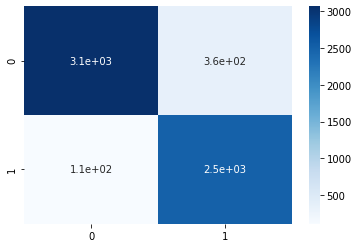

In [36]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

# sumbsission Data

In [99]:
df_test = pd.read_csv("./dataset/test.csv")
df_test.fillna("none", inplace = True)

In [100]:
df_test = one_stop_preprocess(df_test)

In [102]:
y_pred_final = model.predict_classes(df_test)

In [110]:
submission = pd.DataFrame({"id": [x for x in range(20800, 26000)], "label": np.squeeze(np.asarray(y_pred_final))})

In [113]:
submission.to_csv("submit.csv")